In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from config import api_key
import time

In [3]:
#2015 Happiness dataframe
Happy_df_2015 = pd.read_csv("Resources/2015_Clean.csv")

#2016 Happiness dataframe
Happy_df_2016 = pd.read_csv("Resources/2016_Clean.csv")

#2017 Happiness dataframe
Happy_df_2017 = pd.read_csv("Resources/2017_Clean.csv")

#2018 Happiness dataframe
Happy_df_2018 = pd.read_csv("Resources/2018_Clean.csv")

#2019 Happiness dataframe
Happy_df_2019 = pd.read_csv("Resources/2019_Clean.csv")

#2020 Happiness dataframe
Happy_df_2020 = pd.read_csv("Resources/2020_Clean.csv")

#Merging all data sets together
Merge1516_df = pd.merge(Happy_df_2015,Happy_df_2016, on ="country")
Merge1718_df = pd.merge(Happy_df_2017,Happy_df_2018, on ="country")
Merge1920_df = pd.merge(Happy_df_2019,Happy_df_2020, on ="country")
Merge1518_df = pd.merge(Merge1516_df,Merge1718_df, on ="country")
Merge_df = pd.merge(Merge1518_df,Merge1920_df, on ="country")

Merge_df

,country,happiness_score_2015,GDP_per_capita_2015,social_support_2015,life_expectancy_2015,freedom_2015,corruption_2015,generosity_2015,happiness_score_2016,GDP_per_capita_2016,...,freedom_2019,generosity_2019,corruption_2019,happiness_score_2020,GDP_per_capita_2020,social_support_2020,life_expectancy_2020,freedom_2020,generosity_2020,corruption_2020
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.509,1.52733,...,0.572,0.263,0.343,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.501,1.42666,...,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.526,1.44178,...,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.498,1.57744,...,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,...,0.584,0.285,0.308,7.2321,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Afghanistan,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,3.360,0.38227,...,0.000,0.158,0.025,2.5669,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226
134,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,3.515,0.32846,...,0.555,0.217,0.411,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
135,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,3.484,0.39499,...,0.349,0.175,0.082,5.2160,0.366245,0.352428,0.328063,0.405840,0.196670,0.125932
136,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2.905,0.06831,...,0.220,0.176,0.180,3.7753,0.000000,0.403575,0.295213,0.275399,0.187402,0.212187


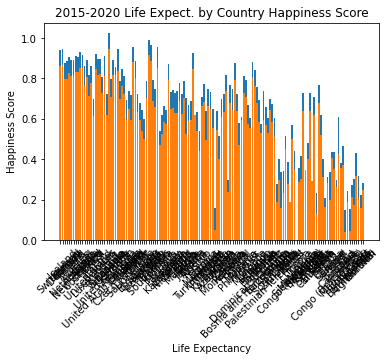

In [25]:
plt.bar(Merge_df["country"], Merge_df["life_expectancy_2015"])
plt.bar(Merge_df["country"], Merge_df["life_expectancy_2016"])
#plt.scatter(Merge_df["life_expectancy_2017"], Merge_df["happiness.score_2017"])
#plt.scatter(Merge_df["life_expectancy_2018"], Merge_df["happiness_score_2018"])
#plt.scatter(Merge_df["life_expectancy_2019"], Merge_df["happiness_score_2019"])
#plt.scatter(Merge_df["life_expectancy_2020"], Merge_df["happiness_score_2020"])
plt.xlabel("Life Expectancy")
plt.xticks(rotation = 45)
plt.ylabel("Happiness Score")
plt.title("2015-2020 Life Expect. by Country Happiness Score")

#plt.legend()
plt.show()

In [12]:
Merge_df.columns

Index(['country', 'happiness_score_2015', 'GDP_per_capita_2015',
       'social_support_2015', 'life_expectancy_2015', 'freedom_2015',
       'corruption_2015', 'generosity_2015', 'happiness_score_2016',
       'GDP_per_capita_2016', 'social_support_2016', 'life_expectancy_2016',
       'freedom_2016', 'corruption_2016', 'generosity_2016',
       'happiness.score_2017', 'GDP_per_capita_2017', 'social_support_2017',
       'life_expectancy_2017', 'freedom_2017', 'corruption_2017',
       'generosity_2017', 'happiness_score_2018', 'GDP_per_capita_2018',
       'social_support_2018', 'life_expectancy_2018', 'freedom_2018',
       'generosity_2018', 'corruption_2018', 'happiness_score_2019',
       'GDP_per_capita_2019', 'social_support_2019', 'life_expectancy_2019',
       'freedom_2019', 'generosity_2019', 'corruption_2019',
       'happiness_score_2020', 'GDP_per_capita_2020', 'social_support_2020',
       'life_expectancy_2020', 'freedom_2020', 'generosity_2020',
       'corruption_202

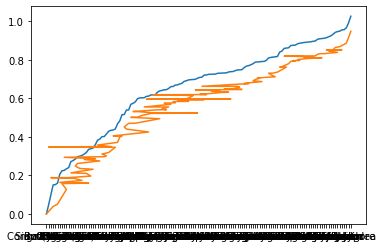

In [32]:
Life15_df = pd.DataFrame()
Life16_df = pd.DataFrame()
Life17_df = pd.DataFrame()
Life18_df = pd.DataFrame()
Life19_df = pd.DataFrame()
Life20_df = pd.DataFrame()

#Making DataFrame for 2015 using Life Expectancy versus each country
Life15_df["country"] = Merge_df["country"]
Life15_df["life_expectancy_2015"] = Merge_df["life_expectancy_2015"]
Life15_df = Life15_df.sort_values(by= "life_expectancy_2015")
plt.plot(Life15_df["country"], Life15_df["life_expectancy_2015"])


#Making DataFrame for 2016 using Life Expectancy versus each country
Life16_df["country"] = Merge_df["country"]
Life16_df["life_expectancy_2016"] = Merge_df["life_expectancy_2016"]
Life16_df = Life16_df.sort_values(by= "life_expectancy_2016")
plt.plot(Life16_df["country"], Life16_df["life_expectancy_2016"])

#Making DataFrame for 2017 using Life Expectancy versus each country
#Life17_df["country"] = Merge_df["country"]
#Life17_df["life_expectancy_2017"] = Merge_df["life_expectancy_2017"]
#Life17_df = Life17_df.sort_values(by= "life_expectancy_2017")
#plt.plot(Life17_df["country"], Life17_df["life_expectancy_2017"])

plt.show()

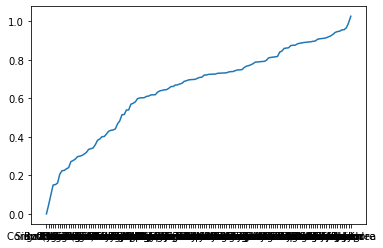

In [25]:
plt.plot(Life15_df["country"], Life15_df["life_expectancy_2015"])
plt.show()

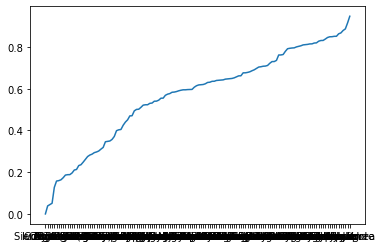

In [28]:
Life16_df = pd.DataFrame()

Life16_df["country"] = Merge_df["country"]
Life16_df["life_expectancy_2016"] = Merge_df["life_expectancy_2016"]
Life16_df = Life16_df.sort_values(by= "life_expectancy_2016")

plt.plot(Life16_df["country"], Life16_df["life_expectancy_2016"])
plt.show()